In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../input/credit-card-transactions/credit_card_transactions-ibm_v2.csv")

In [3]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [4]:
df.shape

(24386900, 15)

In [6]:
df.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


## Questions:
- How many frauds? and what's their ratio to non-fraud?
- Can we only use online transactions?


In [10]:
df[df["Is Fraud?"]=="Yes"].shape,df[df["Is Fraud?"]=="No"].shape

((29757, 15), (24357143, 15))

In [12]:
df[df["Use Chip"]=="Online Transaction"]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,4900,NaN,No
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,ONLINE,NaN,NaN,4899,NaN,No
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,ONLINE,NaN,NaN,5193,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386877,1999,1,2020,2,24,20:04,$55.79,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No
24386879,1999,1,2020,2,25,07:06,$43.08,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No
24386880,1999,1,2020,2,25,07:34,$43.76,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No
24386884,1999,1,2020,2,26,07:43,$45.18,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,4121,NaN,No


In [13]:
df[(df["Use Chip"]=="Online Transaction") & (df["Is Fraud?"]=="Yes")].shape,df[(df["Use Chip"]=="Online Transaction") & (df["Is Fraud?"]=="No")].shape

((18349, 15), (2694871, 15))

In [14]:
#all merchent satate are NaN for online transaction
df[(df["Use Chip"]=="Online Transaction") &(df["Merchant State"].isna())].shape

(2713220, 15)

In [16]:
#all zip are NaN for online transaction
df[(df["Use Chip"]=="Online Transaction") &(df["Zip"].isna())].shape

(2713220, 15)

In [17]:
#all Merchant City are labeled online for online transaction
df[(df["Use Chip"]=="Online Transaction") &(df["Merchant City"]=="ONLINE")].shape

(2713220, 15)

In [25]:
df["User"].nunique() 

2000

In [18]:
#only 5 users don't use online transactions
df[df["Use Chip"]=="Online Transaction"]["User"].nunique() 

1995

In [19]:
18349/29757,2000-1995,(18349/2713220)*100,(29757/24386900)*100

(0.6166280202977451, 5, 0.676281318875727, 0.12202042900081601)

In [20]:
#Chip Transaction
df[df["Use Chip"]=="Chip Transaction"]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
3895,0,0,2015,1,2,06:58,$34.99,Chip Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3896,0,0,2015,1,2,11:54,$1.67,Chip Transaction,6666504894937430109,La Verne,CA,91750.0,5499,NaN,No
3897,0,0,2015,1,2,20:23,$208.96,Chip Transaction,838425044734233142,Mira Loma,CA,91752.0,4814,NaN,No
3898,0,0,2015,1,4,06:27,$136.58,Chip Transaction,1913477460590765860,La Verne,CA,91750.0,5300,NaN,No
3899,0,0,2015,1,4,16:54,$128.64,Chip Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [21]:
df[(df["Use Chip"]=="Chip Transaction") &(df["Is Fraud?"]=="Yes")].shape

(4836, 15)

In [22]:
df[df["Use Chip"]=="Swipe Transaction"]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386456,1999,1,2019,11,5,10:00,$499.00,Swipe Transaction,-7807051024009846392,Annapolis,MD,21401.0,3684,NaN,No
24386466,1999,1,2019,11,6,10:21,$314.07,Swipe Transaction,-7807051024009846392,Annapolis,MD,21401.0,3684,NaN,No
24386698,1999,1,2019,12,24,12:36,$361.97,Swipe Transaction,-8566951830324093739,Muscle Shoals,AL,35661.0,3640,NaN,No
24386796,1999,1,2020,2,3,23:12,$63.18,Swipe Transaction,1670884829620747872,Malone,NY,12953.0,5814,NaN,No


In [24]:
df[(df["Use Chip"]=="Swipe Transaction") &(df["Is Fraud?"]=="Yes")].shape

(6572, 15)

In [26]:
df["Use Chip"].unique()

array(['Swipe Transaction', 'Online Transaction', 'Chip Transaction'],
      dtype=object)

In [27]:
df["Year"].nunique(),df["Year"].unique()

(30,
 array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
        2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1999, 2000, 2001,
        1998, 1996, 1997, 1995, 1994, 1991, 1992, 1993]))

# Why use only online transaction?

- less features asked from the web sectors.
- more combatable with our lovely online bank.
- much smaller dataset: about only 2 mills, insted of 24 mils:)
- already contain 61% of the fraud transactions
- We only loss 5 users.

In [28]:
import pandas as pd
online_df=df[(df["Use Chip"]=="Online Transaction")]

In [29]:
online_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,4900,NaN,No
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,ONLINE,NaN,NaN,4899,NaN,No
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,5311,NaN,No
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,ONLINE,NaN,NaN,5193,NaN,No


Since all Merchant City= Online, Merchant State=NaN, Zip=Nan for the online_df, we can just delete those columns

In [30]:
online_df=online_df.drop(["Merchant City" ,"Merchant State" ,"Zip"],axis=1)
online_df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,MCC,Errors?,Is Fraud?
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,4900,NaN,No
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,4899,NaN,No
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,5311,NaN,No
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,5311,NaN,No
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,5193,NaN,No


In [31]:
online_df.dtypes

User              int64
Card              int64
Year              int64
Month             int64
Day               int64
Time             object
Amount           object
Use Chip         object
Merchant Name     int64
MCC               int64
Errors?          object
Is Fraud?        object
dtype: object

In [32]:
online_df["Year"].nunique(),online_df["Year"].unique()

(26,
 array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
        2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1999, 2000, 2001,
        1998, 1996, 1997, 1995]))

In [33]:
online_df[(online_df["Year"]<2002) & (online_df["Is Fraud?"]=="Yes")]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,MCC,Errors?,Is Fraud?


In [35]:
online_df[(online_df["Year"]<2002)].shape

(41214, 12)

### So before 2002 there were no fraud so I'll remove those rows to make the dataset a litile bit lighter.

In [36]:
online_df.drop(online_df[online_df["Year"]<2002].index, inplace = True)

In [37]:
print(online_df.shape)
online_df.head()

(2672006, 12)


,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,MCC,Errors?,Is Fraud?
11,0,0,2002,9,5,20:41,$53.91,Online Transaction,-9092677072201095172,4900,NaN,No
24,0,0,2002,9,9,20:02,$144.90,Online Transaction,-8338381919281017248,4899,NaN,No
85,0,0,2002,9,30,06:21,$127.32,Online Transaction,-7421093378627544099,5311,NaN,No
99,0,0,2002,10,6,06:14,$139.39,Online Transaction,-7421093378627544099,5311,NaN,No
106,0,0,2002,10,9,08:16,$53.09,Online Transaction,-4956618006720593695,5193,NaN,No


### Most error column is just Null

In [38]:
online_df[(online_df["Errors?"].notnull())&(online_df["Is Fraud?"]=="Yes")].shape[0],online_df[(online_df["Errors?"].notnull())&(online_df["Is Fraud?"]=="No")].shape[0]

(807, 59765)

In [39]:
(online_df[(online_df["Errors?"].isna())].shape[0]/online_df.shape[0])*100

97.73308892270451

In [40]:
#https://www.investopedia.com/terms/m/merchant-category-codes-mcc.asp
online_df["MCC"].nunique(),online_df[online_df["MCC"].isna()]

(76,
 Empty DataFrame
 Columns: [User, Card, Year, Month, Day, Time, Amount, Use Chip, Merchant Name, MCC, Errors?, Is Fraud?]
 Index: [])

## Why is Merchant Name a number and what does it represent?

It doesn't represent the user, it's dealer's name. there are only 218 merchants featured in this dataset.

In [41]:
online_df["Merchant Name"].nunique(),online_df[online_df["Merchant Name"].isna()]

(218,
 Empty DataFrame
 Columns: [User, Card, Year, Month, Day, Time, Amount, Use Chip, Merchant Name, MCC, Errors?, Is Fraud?]
 Index: [])

### Does fraud increase over years?

In [42]:
import matplotlib.pyplot as plt

year_vs_frauds=online_df.groupby(by="Year").agg('Is Fraud?').describe()
year_vs_frauds["fraud_count"]=year_vs_frauds["count"]-year_vs_frauds["freq"]
year_vs_frauds


,count,unique,top,freq,fraud_count
Year,,,,,
2002,27171,2,No,27069,102
2003,38461,2,No,38197,264
2004,50617,2,No,50240,377
2005,68457,2,No,68441,16
2006,87467,1,No,87467,0
2007,106989,2,No,105738,1251
2008,127392,2,No,124827,2565
2009,142466,2,No,141772,694
2010,162638,2,No,159180,3458


In [43]:
#just making sure :)
online_df[(online_df["Year"]==2020) & (online_df["Is Fraud?"]=="Yes")]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,MCC,Errors?,Is Fraud?


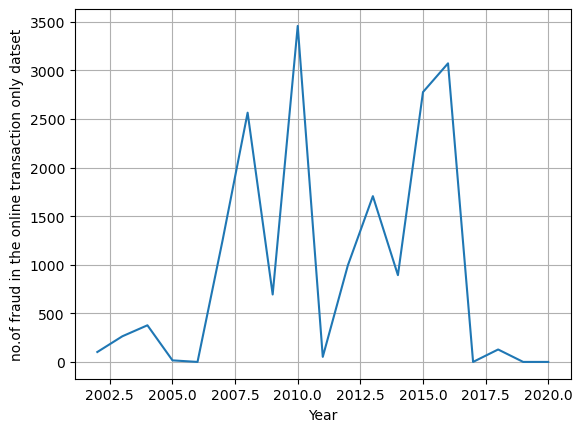

In [44]:
#I don't think there is an obvious trend 
year_vs_frauds["fraud_count"].plot(grid=True)
plt.ylabel("no.of fraud in the online transaction only datset")
plt.show()

### after 2018 there were no fraud so I'll remove those rows to make the dataset a litile bit lighter

In [45]:
online_df.drop(online_df[online_df["Year"]>2018].index, inplace = True)
online_df.shape

(2415369, 12)

In [47]:
df=pd.read_csv("/kaggle/input/credit-card-transactions/credit_card_transactions-ibm_v2.csv")
orginal_year_vs_frauds=df.groupby(by="Year").agg('Is Fraud?').describe()
orginal_year_vs_frauds["fraud_count"]=orginal_year_vs_frauds["count"]-orginal_year_vs_frauds["freq"]
orginal_year_vs_frauds

,count,unique,top,freq,fraud_count
Year,,,,,
1991,1585,1,No,1585,0
1992,5134,1,No,5134,0
1993,8378,1,No,8378,0
1994,14316,1,No,14316,0
1995,20928,1,No,20928,0
1996,29945,2,No,29935,10
1997,49753,2,No,49721,32
1998,78345,2,No,78313,32
1999,118250,2,No,118226,24


In [48]:
df[df["Is Fraud?"]=="Yes"].shape,df.shape

((29757, 15), (24386900, 15))

In [50]:
(29757/24386900)*100

0.12202042900081601

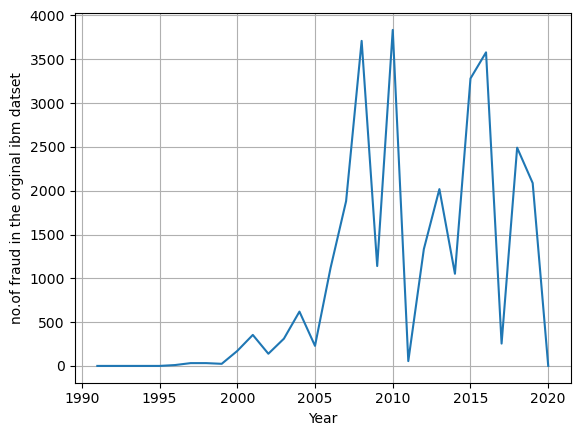

In [49]:
orginal_year_vs_frauds["fraud_count"].plot(grid=True)
plt.ylabel("no.of fraud in the orginal ibm datset")
plt.show()

I was afarid that choosing only thr online transaction have messed up the year vs no.of frauds relationship but they seem fine to me ")

But on the other side you can see that 2019 got frauds in the orginal df and 2019 got no fraud on the online_df